In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
inputs = tf.keras.layers.Input(shape=(150, 150, 3))

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D(2)(x)
x = tf.keras.layers.Dropout(0.2)(x)

x = tf.keras.layers.Conv2D(32, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)
x = tf.keras.layers.Dropout(0.2)(x)

x = tf.keras.layers.Conv2D(64, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)
x = tf.keras.layers.Dropout(0.2)(x)

x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)

outputs = tf.keras.layers.Dense(62, activation='softmax')(x)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='rmsprop')


In [2]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.1, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    "data/train",
    target_size=(150, 150),
    class_mode='categorical',
    seed = 42
)

val_gen = val_datagen.flow_from_directory(
    "data/validation",
    target_size=(150, 150),
    class_mode='categorical',
    seed = 42
)

Found 2728 images belonging to 62 classes.
Found 682 images belonging to 62 classes.


In [3]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_acc', save_best_only=True)

history = model.fit(
    train_gen,
    epochs=25,
    validation_data=val_gen,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/25


86/86 [==============================] - 31s 352ms/step - loss: 4.7317 - acc: 0.0220 - val_loss: 4.1232 - val_acc: 0.0367
Epoch 2/25


C:\Users\david\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


86/86 [==============================] - 29s 340ms/step - loss: 4.0304 - acc: 0.0374 - val_loss: 3.6533 - val_acc: 0.0938
Epoch 3/25
86/86 [==============================] - 29s 339ms/step - loss: 3.7317 - acc: 0.0843 - val_loss: 3.2211 - val_acc: 0.1906
Epoch 4/25
86/86 [==============================] - 29s 342ms/step - loss: 3.4088 - acc: 0.1371 - val_loss: 2.7981 - val_acc: 0.2977
Epoch 5/25
86/86 [==============================] - 30s 350ms/step - loss: 3.1566 - acc: 0.1719 - val_loss: 2.5638 - val_acc: 0.3856
Epoch 6/25
86/86 [==============================] - 30s 347ms/step - loss: 2.9949 - acc: 0.2111 - val_loss: 2.2975 - val_acc: 0.4413
Epoch 7/25
86/86 [==============================] - 31s 354ms/step - loss: 2.7922 - acc: 0.2573 - val_loss: 2.0860 - val_acc: 0.4457
Epoch 8/25
86/86 [==============================] - 30s 344ms/step - loss: 2.6374 - acc: 0.2845 - val_loss: 1.9112 - val_acc: 0.4912
Epoch 9/25
86/86 [==============================] - 42s 496ms/step - loss: 2.502

In [4]:
validation_loss, validation_acc = model.evaluate(val_gen)
print(f"Validation Accuracy: {validation_acc * 100:.2f}%")

22/22 [==============================] - 5s 202ms/step - loss: 0.9715 - acc: 0.7463
Validation Accuracy: 74.63%


In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def diagnostic_learning_curves():
  # Retrieve a list of accuracy results on training and validation data
  # sets for each training epoch
  acc = history.history['acc']
  val_acc = history.history['val_acc']

  # Retrieve a list of list results on training and validation data
  # sets for each training epoch
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  # Get number of epochs
  epochs = range(len(acc))
  
  # Plot training and validation accuracy per epoch
  plt.plot(epochs, acc)
  plt.plot(epochs, val_acc)
  plt.title('Training and validation accuracy')

  plt.figure()

  # Plot training and validation loss per epoch
  plt.plot(epochs, loss)
  plt.plot(epochs, val_loss)
  plt.title('Training and validation loss')

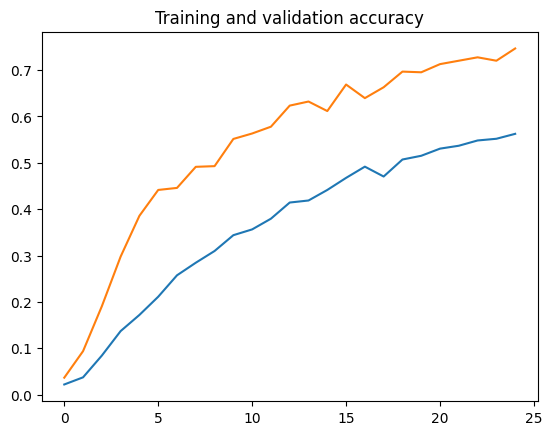

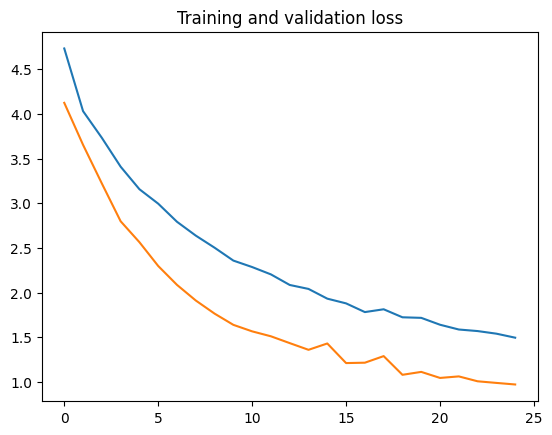

In [6]:
diagnostic_learning_curves()

1/1 [==============================] - 0s 23ms/step


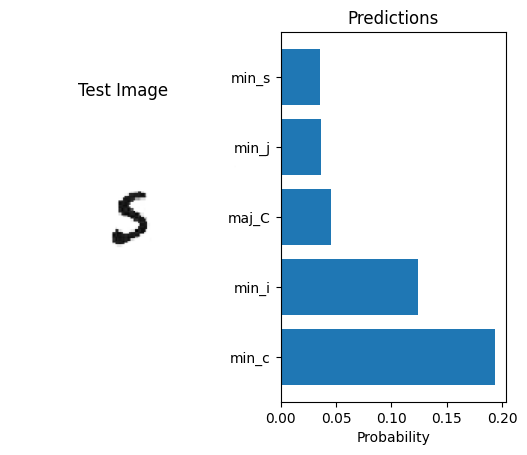

In [12]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image de test
test_image_path = 'C:/Users/david/Downloads/ocr_s.png'
test_img = image.load_img(test_image_path, target_size=(150, 150))

# Convertir l'image en tableau Numpy
test_img_array = image.img_to_array(test_img)
test_img_array = np.expand_dims(test_img_array, axis=0)
test_img_array /= 255.0  # Normaliser l'image

# Utiliser le modèle pour la prédiction
predictions = model.predict(test_img_array)

# Récupérer les noms des classes
class_names = list(train_gen.class_indices.keys())

# Obtenir les indices des 5 meilleures prédictions
top5_indices = np.argsort(predictions.ravel())[-5:][::-1]
top5_classes = [class_names[i] for i in top5_indices]
top5_probs = predictions.ravel()[top5_indices]

# Affichage de l'image
plt.subplot(1, 2, 1)
plt.imshow(test_img)
plt.title('Test Image')
plt.axis('off')

# Affichage des résultats de la prédiction (Top 5)
plt.subplot(1, 2, 2)
plt.barh(top5_classes, top5_probs)
plt.xlabel('Probability')
plt.title('Predictions')
plt.show()